# Investigate signups to (anonymized) mailing list
## Suggested aims
- Explore origin of domains, and identify opportunities to spread mailing list
- Explore temporal pattern of signups and test impact of interventions vs. natural growth

## Aim of this notebook
- Provide suggestions on growing mailing list (and underlying community at NU) further
- Provide entry for custom analysis

## Suggested initial approaches (covered)
- pandas: loading data, basic time series


## Level
Entry; Intermediate for custom extensions

# Data background

Mailing lists and listservs can be an important tool to reach communities at a University. However, analysing them might also provide chances to identify missed opportunities. 

# Analysis

## General settings

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Data import and initial inspection

In [2]:
# complete the path to the anonymized mailing list, which should be in the same directory
# as this notebook
path_to_mail = './anonymized_mailing_list.csv'

In [3]:
# Import the anonymized mail data
df_mail = pd.read_csv(path_to_mail)

In [4]:
# Inspect the first entries
df_mail.head()

,user_id,domain,signup
0,0,KELLOGG.NORTHWESTERN.EDU,2017-10-26
1,1,NORTHWESTERN.EDU,2017-10-10
2,2,KELLOGG.NORTHWESTERN.EDU,2016-06-29
3,3,NORTHWESTERN.EDU,2017-04-24
4,4,U.NORTHWESTERN.EDU,2017-10-10


## Domains used in mailing list

In [5]:
# count the number of occurences of every domain, and divide by the length of the table
df_mail['domain'].value_counts() / df_mail['domain'].shape[0]

U.NORTHWESTERN.EDU          0.384127
NORTHWESTERN.EDU            0.285714
GMAIL.COM                   0.231746
KELLOGG.NORTHWESTERN.EDU    0.041270
UCHICAGO.EDU                0.022222
HOTMAIL.COM                 0.009524
UMICH.EDU                   0.006349
YAHOO.COM                   0.006349
LURIECHILDRENS.ORG          0.003175
EECS.NORTHWESTERN.EDU       0.003175
GRAVITY.PHYS.UWM.EDU        0.003175
GALTON.UCHICAGO.EDU         0.003175
Name: domain, dtype: float64

## Time Series analysis

In [6]:
# convert signup to datetime format
df_mail['signup'] = pd.to_datetime(df_mail['signup'])

In [7]:
# group by month
df_mail.index = df_mail['signup']
grouped_by_month = df_mail.groupby(pd.TimeGrouper('M'))

In [8]:
# create table with sign-ups per month
signups_per_month = grouped_by_month.size().to_frame('signups')
signups_per_month.index.name = 'month'

In [9]:
# inspect top of table
signups_per_month.head()

,signups
month,
2016-06-30,30
2016-07-31,24
2016-08-31,1
2016-09-30,1
2016-10-31,2


(0, 350)

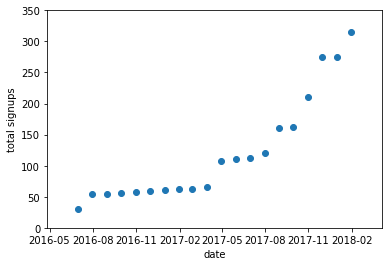

In [10]:
# plot cumulative number of sign-ups
plt.scatter(
    signups_per_month.index, 
    np.cumsum(
        signups_per_month['signups']))
plt.xlabel('date')
plt.ylabel('total signups')
plt.ylim((0,350 ))

# Possible further directions
- Add external data from Northwestern to identify departments and institutes, which aren't reached by this maliling list
- Analyse time series for individual domains
- Compare passive growth vs. growth after active advertisment of the mailing list (Dates of active advertising: June 2016, July 2016, April 2017, August 2017, October 2017, November 2017, January 2018)
